# Deep Learning

In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Explorando os Dados

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

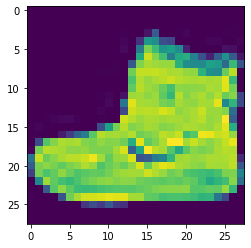

In [5]:
plt.imshow(imagens_treino[0])

Text(0.5, 1.0, '9')

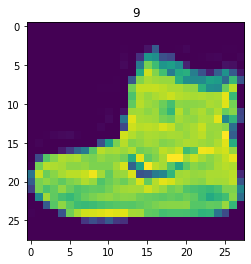

In [6]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [7]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
identificacoes_treino.min()

0

In [9]:
identificacoes_treino.max()

9

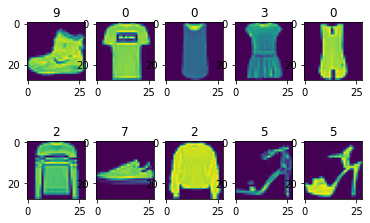

In [10]:
total_de_classificacoes = 10

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

| Label	| Description|
| -------------  | --- |
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|



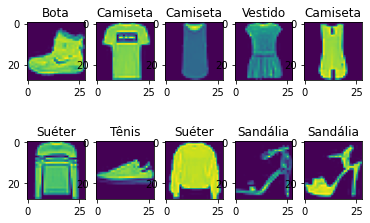

In [11]:
nome_classificacoes = ['Camiseta', 'Calça', 'Suéter',
                       'Vestido', 'Casaco', 'Sandália',
                       'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

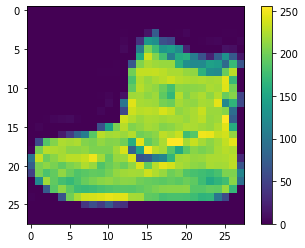

In [12]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando, Copilando e Normalizando o Modelo

In [14]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 3.4642 - accuracy: 0.6578 - val_loss: 0.7769 - val_accuracy: 0.7009
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8256 - accuracy: 0.7128 - val_loss: 0.6352 - val_accuracy: 0.7818
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7735 - accuracy: 0.7260 - val_loss: 0.5977 - val_accuracy: 0.7838
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7331 - accuracy: 0.7345 - val_loss: 0.6194 - val_accuracy: 0.7952
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7096 - accuracy: 0.7428 - val_loss: 0.5532 - val_accuracy: 0.8096


In [15]:
from tensorflow.keras.models import load_model

modelo.save('modelo_epochs5_drop20.h5')
modelo_salvo = load_model('modelo_epochs5_drop20.h5')

In [16]:
historico.history

{'loss': [3.464226245880127,
  0.8255751132965088,
  0.7734763026237488,
  0.7331140041351318,
  0.709597110748291],
 'accuracy': [0.6578333377838135,
  0.7127916812896729,
  0.7260416746139526,
  0.734541654586792,
  0.7427916526794434],
 'val_loss': [0.7769498825073242,
  0.6351994276046753,
  0.5977301597595215,
  0.6193850636482239,
  0.5532297492027283],
 'val_accuracy': [0.7009166479110718,
  0.7817500233650208,
  0.7838333249092102,
  0.7951666712760925,
  0.809583306312561]}

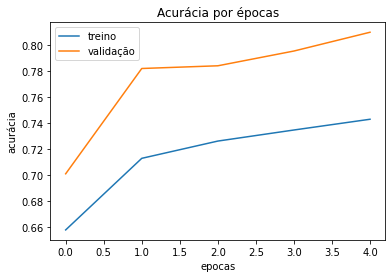

In [17]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

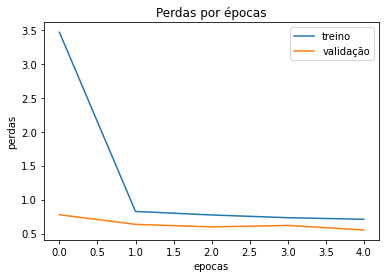

In [18]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

## Realizando Predict

In [19]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imagem de teste {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[0])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[0]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 9
número da imagem de teste 9
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 9
Número da imagem de teste modelo salvo 9


In [20]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[2])}')
print(f'número da imagem de teste {identificacoes_teste[2]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[2])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[2]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 1
número da imagem de teste 1
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 1
Número da imagem de teste modelo salvo 1


In [21]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[4])}')
print(f'número da imagem de teste {identificacoes_teste[4]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[4])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[4]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 6
número da imagem de teste 6
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 6
Número da imagem de teste modelo salvo 6


In [22]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste {perda_teste}')
print(f'Ácuracia do teste {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5747 - accuracy: 0.8038
Perda do teste 0.5747406482696533
Ácuracia do teste 0.8037999868392944
